In [ ]:
import pandas as pd
df=pd.read_csv("https://raw.githubusercontent.com/Apaulgithub/oibsip_taskno4/main/spam.csv", encoding='ISO-8859-1')
df=df[['v1','v2']]
df.columns=['category','message']
df.head()

,category,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


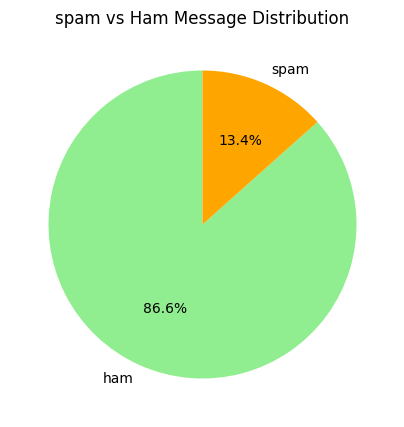

In [ ]:
import matplotlib.pyplot as plt
category_counts=df['category'].value_counts()
plt.figure(figsize=(5,5))
category_counts.plot(kind='pie',autopct='%1.1f%%',startangle=90,colors=['lightgreen','orange'])
plt.title("spam vs Ham Message Distribution")
plt.ylabel('')
plt.show()

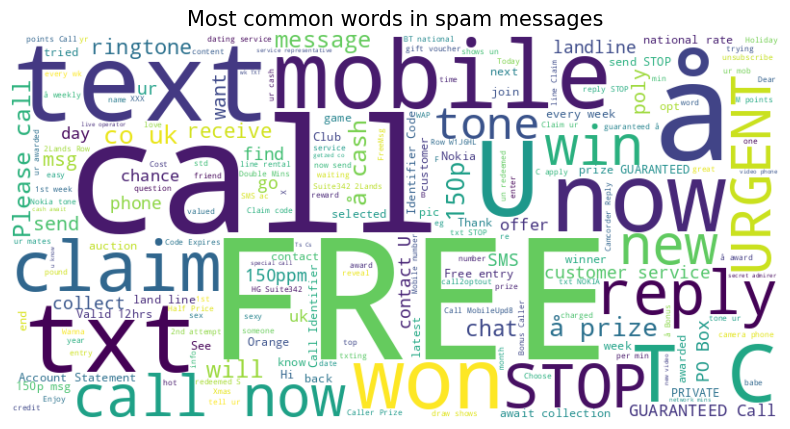

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Get all spam messages
spam_message = df[df['category'] == 'spam']['message']

# Join all spam messages into one string
text = " ".join(spam_message)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most common words in spam messages", fontsize=15)
plt.show()


In [ ]:
df['spam'] = df['category'].apply(lambda x: 1 if x == 'spam' else 0)
from sklearn.model_selection import train_test_split
x=df['message']
y=df['spam']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5,random_state=42)

#create a pipeline
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

model=Pipeline([
    ('vectorizer',CountVectorizer()),
    ('nb',MultinomialNB())
])
model.fit(x_train,y_train)

#predict and test
from sklearn.metrics import classification_report,confusion_matrix
y_pred=model.predict(x_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))

def check_spam(msg):
  result=model.predict([msg])
  return "spam" if result[0]==1 else "Ham"

  print(check_spam("Congratulations! You’ve won a prize. Call now!"))


Confusion Matrix:
 [[2401   10]
 [  33  342]]

 Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      2411
           1       0.97      0.91      0.94       375

    accuracy                           0.98      2786
   macro avg       0.98      0.95      0.97      2786
weighted avg       0.98      0.98      0.98      2786

